In [97]:
# import dependecies
import pandas as pd
import numpy as np
#import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt

In [98]:
maindf = pd.read_csv('../Project-3/datasets_insurance.csv')
maindf.shape

(1338, 7)

In [99]:
maindf

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Data Analysis

# Age Group

In [100]:
maindf['age'].describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

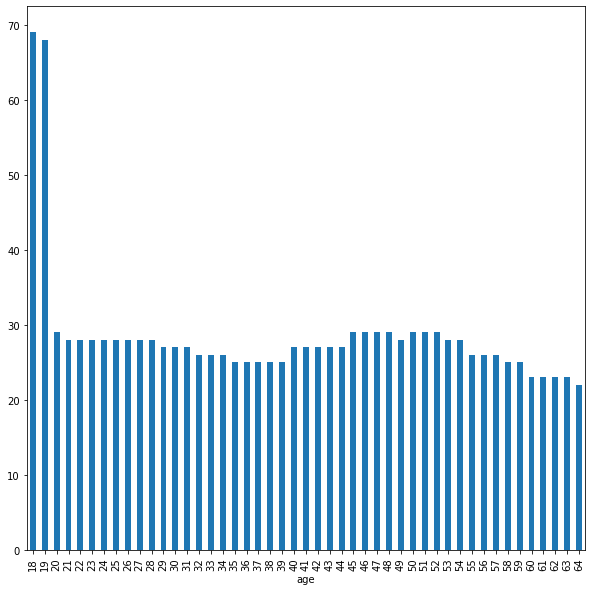

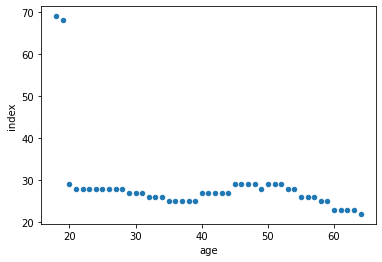

In [101]:
maindf.reset_index().groupby('age')['index'].count().plot(kind='bar',figsize=(10,10))
pd.DataFrame(maindf.reset_index().groupby('age')['index'].count().reset_index()).plot(kind='scatter',x='age',y='index')

# Scatter Plot showing Age/Charges

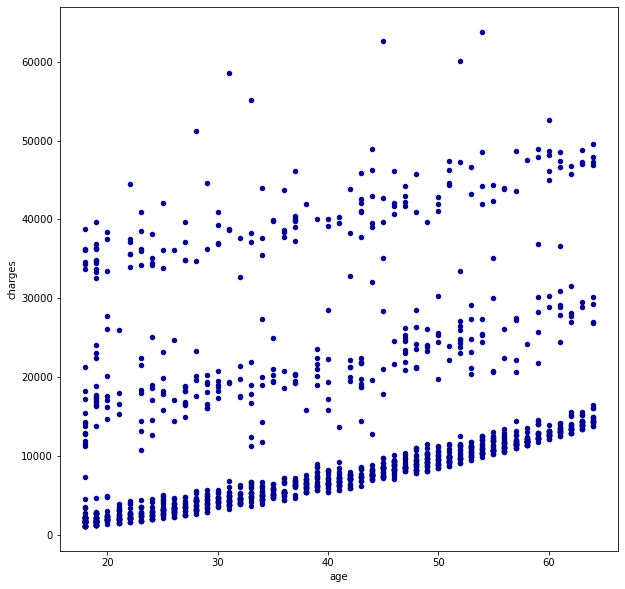

In [102]:
maindf[['age','charges']].plot(kind='scatter',x='age',y='charges',c='DarkBlue',figsize=(10,10))

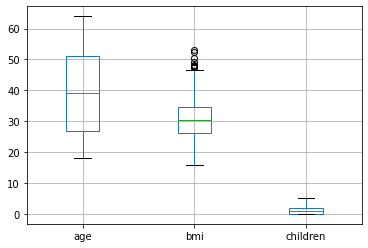

In [103]:
#boxplot = df.boxplot(column=['Col1', 'Col2', 'Col3'])
maindf.boxplot(column=['age', 'bmi', 'children'])

# Data Analysis on Gender

In [104]:
maindf['sex'].describe()

count     1338
unique       2
top       male
freq       676
Name: sex, dtype: object

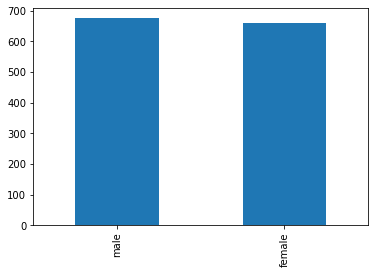

In [105]:
#maindf['sex']
maindf['sex'].value_counts().plot(kind='bar')

# Analysis between Sex & Charges

C:\Users\ojnde\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ojnde\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002016B10DC88>,
      dtype=object)

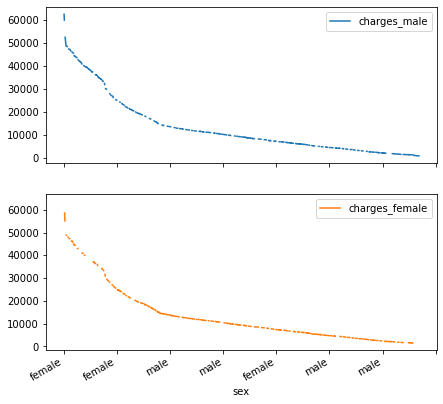

In [106]:
temp  = maindf[['sex','charges']]
temp['charges_male']= temp[temp['sex']=='male']['charges']
temp['charges_female']  = temp[temp['sex']!='male']['charges']
temp = temp.sort_values('charges',ascending=False)
temp[['sex', 'charges_male', 'charges_female']].set_index('sex').plot(figsize=(7,7),subplots=True)

In [107]:
temp['charges_male'].describe()

count      676.000000
mean     13956.751178
std      12971.025915
min       1121.873900
25%       4619.134000
50%       9369.615750
75%      18989.590250
max      62592.873090
Name: charges_male, dtype: float64

In [108]:
temp['charges_female'].describe()

count      662.000000
mean     12569.578844
std      11128.703801
min       1607.510100
25%       4885.158700
50%       9412.962500
75%      14454.691825
max      63770.428010
Name: charges_female, dtype: float64

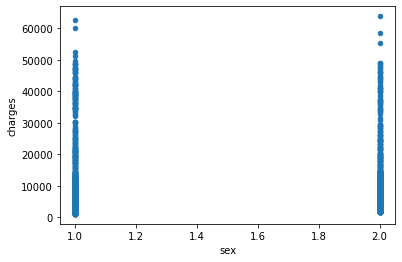

In [109]:
temp=maindf.copy()
temp.loc[temp['sex']=='male','sex']=str(1)
temp.loc[temp['sex']!='1','sex']=str(2)

temp['sex']= temp['sex'].astype(int)
#temp['sex'].unique()
temp[['sex','charges']].plot(kind='scatter',x='sex',y='charges')

# BMI Analysis

In [110]:
maindf['bmi'].describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

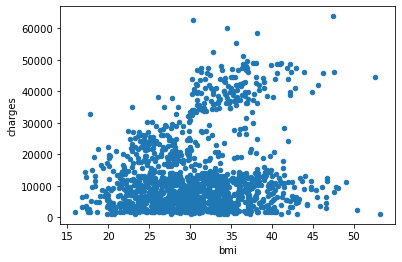

In [111]:
maindf[['bmi','charges']].plot(kind='scatter',x='bmi',y='charges')

# Analysis with Children

In [112]:
maindf.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [113]:
maindf['children'].describe()

count    1338.000000
mean        1.094918
std         1.205493
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: children, dtype: float64

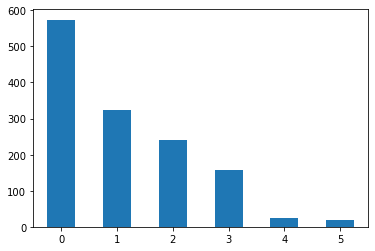

In [114]:
maindf['children'].value_counts().plot(kind='bar',rot=0)

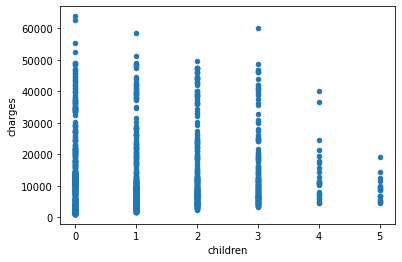

In [115]:
maindf[['children','charges']].plot(kind='scatter',x='children',y='charges')

# Analysis on Smokers

In [116]:
maindf['smoker'].describe()

count     1338
unique       2
top         no
freq      1064
Name: smoker, dtype: object

In [117]:
maindf['smoker'][maindf['smoker']=='no'] = str(0)
maindf['smoker'][maindf['smoker']!='0'] = str(1)
maindf['smoker'] = maindf['smoker'].astype(int)


C:\Users\ojnde\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\ojnde\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


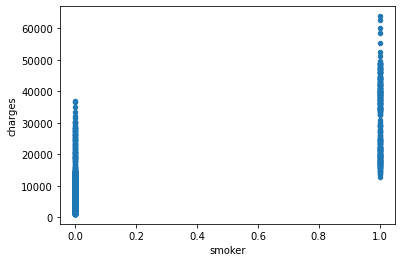

In [118]:
maindf[['smoker','charges']].plot(kind='scatter',x='smoker',y='charges')

# Regional Analysis

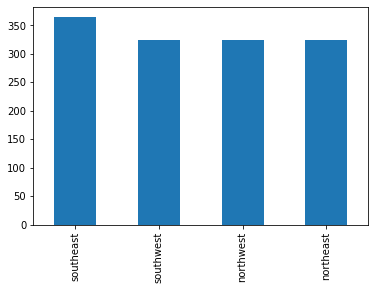

In [119]:
maindf['region'].value_counts().plot(kind='bar')

southwest  =  0
southeast  =  1
northwest  =  2
northeast  =  3


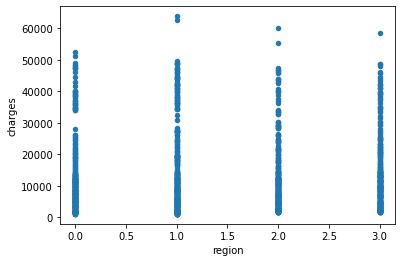

In [120]:
temp = maindf[['region','charges']].copy()
temp['temp'] = np.nan
q=-1
for region in maindf['region'].unique():
    q+=1
    temp.loc[temp['region']==region,'temp'] = str(q)
    print(region,' = ',q)
    
temp['region'] = np.nan
temp['region']= temp['temp']
temp['region'] = temp['region'].astype(int)
del temp['temp']
temp[['region','charges']].plot(kind='scatter',x='region',y='charges')

# Correlating each variables with charges

In [121]:
# maindf.corr()['charges'].sort_values(ascending=False)[1:]*100

In [122]:
maindf = pd.read_csv('../Project-3/datasets_insurance.csv')

In [123]:
temp = maindf.copy()
temp.loc[temp['sex']=='male','sex']=str(1)
temp.loc[temp['sex']!='1','sex']=str(2)

temp['sex']= temp['sex'].astype(int)

temp['smoker'][temp['smoker']=='no'] = str(0)
temp['smoker'][temp['smoker']!='0'] = str(1)
temp['smoker'] = temp['smoker'].astype(int)



temp['temp'] = np.nan
q=-1
for region in maindf['region'].unique():
    q+=1
    temp.loc[temp['region']==region,'temp'] = str(q)
    #print(region,' = ',q)
    
temp['region'] = np.nan
temp['region']= temp['temp']
temp['region'] = temp['region'].astype(int)
del temp['temp']
maindf = temp.copy()

C:\Users\ojnde\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\ojnde\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [124]:
maindf.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [125]:
maindf.corr()['charges'].sort_values(ascending=False)[1:]

smoker      0.787251
age         0.299008
bmi         0.198341
children    0.067998
region      0.006208
sex        -0.057292
Name: charges, dtype: float64

# Findings

###### Finding correlations between different categories, e.g. bmi vs charges, smokers vs charges, children vs charges: 
##### It seems smokerS is highest when correlated with charges and the same pattern can be seen in visuals of smoker vs charges.

##### What categories contributed more to the health cost, if so & why? categories columns : smoker,children,region. Yes, smoker is contrbuting most to the health cost , and rightly so is because smokers are more vulnerable to lung cancer, and other types of cancer , so they do spend more on insurance.

##### What are the effects of medical/health cost between male & female, cigarettes usage, BMI effects? Effects of health cost on sex: Gender does not contribute at all to charges, means gender has no effect on charges . Either you are male and female, charges are unrelated to this. 

##### Effects of cigrattes (smokers) on health cost: As obvious, smokers are more vulnerable to health issues so they do have more charges than non-smokers effect of BMI on health cost: As shown in above visuals 'bmi vs charges' , there is a mix of response on charges, low bmi's also have high charges and high bmi's do also have high charges, and correlation also close to 0, so we can say that BMI has no effect on health cost.

# Machine Learning Part

Purpose: To determine the effect of several factors on insurance costs & predict the cost of health insurance based on factors that influence it.

In [126]:
maindf = pd.read_csv('../Project-3/datasets_insurance.csv')
maindf.shape

(1338, 7)

From the data analysis part we can see 3 factors are most influencing for the charge colum: 
a) smoker
b) age
c) bmi
All 3 columns are responsible for the increase or decrease in price

### Converting categorical column "Smoker" into integer for ML algorithm input

In [127]:
maindf['smoker'][maindf['smoker']=='no'] = str(0)
maindf['smoker'][maindf['smoker']!='0'] = str(1)
maindf['smoker']= maindf['smoker'].astype(int)

C:\Users\ojnde\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\ojnde\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [128]:
maindf.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker        int32
region       object
charges     float64
dtype: object

### Now we do have columns in integer and floating points

In [129]:
y = maindf['charges']
x = maindf[['smoker','age','bmi']].iloc[:,:]
x

,smoker,age,bmi
0,1,19,27.900
1,0,18,33.770
2,0,28,33.000
3,0,33,22.705
4,0,32,28.880
...,...,...,...
1333,0,50,30.970
1334,0,18,31.920
1335,0,18,36.850
1336,0,21,25.800


### Normalizing inut columns age and bmi

In [130]:
x['age']=x['age']/x['age'].max()
x['bmi']=x['bmi']/x['bmi'].max()

C:\Users\ojnde\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\ojnde\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Train test split to judge how well our model is performing

In [131]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.33, random_state=42)

### Decision Tree Regressor

In [132]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

#X, y = load_diabetes(return_X_y=True)
regressor = DecisionTreeRegressor()

cross_val_score(regressor, X_train, y_train, cv=10)
regressor=regressor.fit(X_train,y_train)

from sklearn.metrics import mean_squared_error
from math import sqrt 

y_pred = regressor.predict(X_test)
sqrt(mean_squared_error(y_test, y_pred,squared=True))

                   # doctest: +SKIP

6773.849859736164

THE RMSE SCORE: 6773 is of base model

In [133]:
print(pd.DataFrame(data=[x.columns,regressor.feature_importances_,]))

          0         1        2
0    smoker       age      bmi
1  0.610508  0.145743  0.24375


The model is also showing the data analysis part to be strong by suggesting the smoker columns are the most important (61%) of all three variables above.

# HYPER PARAMETER TUNING

In [134]:
final_regressor = DecisionTreeRegressor( criterion='mse', splitter='best', max_depth=10, min_samples_split=50, 
             min_samples_leaf=5, min_weight_fraction_leaf=0.001, max_features=2, random_state=None, 
             max_leaf_nodes=None, min_impurity_decrease=0.0, 
             min_impurity_split=None, presort='deprecated', ccp_alpha=0.01)

cross_val_score(final_regressor, X_train, y_train, cv=10)
final_regressor=final_regressor.fit(X_train,y_train)

from sklearn.metrics import mean_squared_error
from math import sqrt 

y_pred = final_regressor.predict(X_test)
sqrt(mean_squared_error(y_test, y_pred,squared=True))

4903.127141676565

The model looks better after hyperparameter tuning. So, lets try XGboost regressor and see if this will produce a better result than this.

In [136]:
regressor = ensemble.GradientBoostingRegressor( loss='ls', learning_rate=0.01, n_estimators=70, subsample=1.0, 
                                   criterion='friedman_mse', min_samples_split=50, min_samples_leaf=5,
                                   min_weight_fraction_leaf=0.0, max_depth=10, min_impurity_decrease=0.0, 
                                   min_impurity_split=None, init=None, random_state=None, max_features=None, alpha=0.9, 
                                   verbose=0, max_leaf_nodes=None, warm_start=False, presort='deprecated', validation_fraction=0.1,
                                   n_iter_no_change=None, tol=0.0001, ccp_alpha=0.01)


cross_val_score(regressor, X_train, y_train, cv=10)
regressor=regressor.fit(X_train,y_train)

from sklearn.metrics import mean_squared_error
from math import sqrt 

y_pred = regressor.predict(X_test)
sqrt(mean_squared_error(y_test, y_pred,squared=True))

NameError: name 'ensemble' is not defined